In [9]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import cv2
from sklearn.externals.joblib import Parallel, delayed
from skimage.restoration import denoise_nl_means,estimate_sigma
from scipy import signal
from joblib import Parallel, delayed
import os
import h5py
from numba import cuda,float32,uint16,float64  
import time
import pickle
from sel_active_reg_gen import sel_active_reg






In [13]:
with open('/media/DATA/jbonato/astro_segm/set1/.tmp/dict_dataset1.txt', "rb") as fp:   
    dict_param = pickle.load(fp)
    

# dict_param['blocks']=15
# dict_param['threads']=24
# dict_param['BPM_ratio']=4
# dict_param['N_pix_st']=50
# dict_param['astr_min']=50
# dict_param['th1_p']=.25
# dict_param['th2_p']=.1
# dict_param['max_min']=np.asarray([345,60])
# dict_param['astro_num']=40
# dict_param['bb']=80
# dict_param['pad']=8
# dict_param['list']=[i*54 for i in range(9)]
# dict_param['list'][-1]=432
# dict_param['decr_dim'] = 5
# dict_param['init_th'] = 0.5
# dict_param['decr_th'] = 7.333333333333333*25

# with open('/media/DATA/jbonato/astro_segm/set4/.tmp/dict_dataset.txt', "rb") as fp:   #Pickling
#     dict_param = pickle.load(fp)
# dict_param['init_th_'] = 0.5

# dict_param['BPM_ratio']=3
# dict_param['blocks']= 15
# dict_param['threads']=32

dict_param = {
    'list':[0,40,80,120,160],
    'blocks':20,
    'threads':24,
    'BPM_ratio':4,
    'bb':96,
    
    'N_pix_st':100, #starting minimum area
    'astr_min':80, # approx. 0.9 min in dataset
    'percentile': 80,
    'pad':5,
    'astro_num':4, # number of astro min in FOV
    'init_th_':0.6, # threshold initialization
    'decr_dim':10, # astro area decrease
    'decr_th':25, # temporal threshold decrease
    'corr_int':False, # intensity correction flag
    'gpu_flag':True
}
dict_param




{'list': [0, 40, 80, 120, 160],
 'blocks': 20,
 'threads': 24,
 'BPM_ratio': 4,
 'bb': 96,
 'N_pix_st': 100,
 'astr_min': 80,
 'percentile': 80,
 'pad': 5,
 'astro_num': 4,
 'init_th_': 0.6,
 'decr_dim': 10,
 'decr_th': 25,
 'corr_int': False,
 'gpu_flag': True}

In [14]:
stack = np.zeros((4000,256,256))

a_reg = sel_active_reg(stack.astype(np.float32),dict_param)

A,B = a_reg.check_sel_active_reg_gpu_gen(void_out=False,debug=False)

GPU started with  (20, 20)  blocks and  (24, 24)  threads per block
Iteration per block:  1.0
debug False


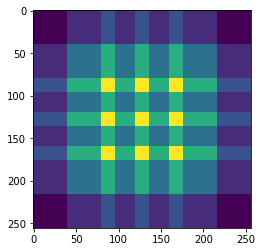

In [15]:
plt.imshow(B)